# Data Mining Week 5 with Professor Sloan

## Maggie Boles

### Using the Amazon Alexa reviews dataset, build a logistic regression model to predict positive or negative feedback based on review text. Be sure to run a test with something random you create (out of sample). Remember: 1 is positive, 0 is negative.
    At the end of Chapter 5, the author uses a custom-built class to summarize model performance. This class doesn’t actually exist (from the author) but you can make it a reality. Using the object you have from mnb_predictions, create something similar to the output on page 335. Feel free (but not obligated) to venture further into the label names and numbers (page 336) and confusion matrix (page 337).


=== Model Performance Summary ===
Model Type: LogisticRegression

Performance Metrics:
Accuracy: 0.9079
Precision: 0.9780
Recall: 0.9206
F1-Score: 0.9484

Label Distribution (Test Set):
Negative (Label 0): 51 instances
Positive (Label 1): 579 instances

Confusion Matrix:
                        Predicted
               Negative   Positive
      Actual   Negative         39         12
               Positive         46        533


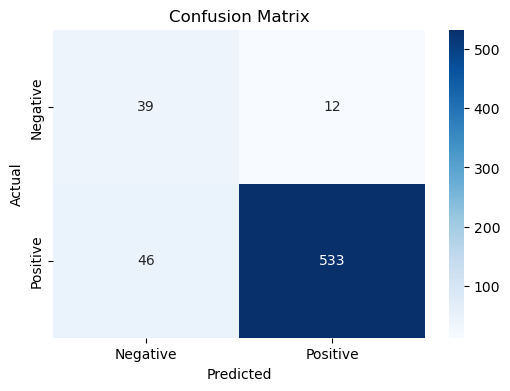


=== Out-of-Sample Test (Negative Example) ===
Random Review: This Alexa is terrible and doesn't work at all
Predicted Feedback: 0 (Negative)
Probabilities: Negative 0.9498, Positive 0.0502

=== Out-of-Sample Test (Positive Example) ===
Random Review: I love this Alexa device, it works perfectly!
Predicted Feedback: 1 (Positive)
Probabilities: Negative 0.0477, Positive 0.9523


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re

# Custom class for model performance summary (inspired by page 335, with labels page 336, confusion matrix page 337)
class ModelPerformanceSummary:
    def __init__(self, model, X_test, y_test, y_pred, class_names=['Negative', 'Positive']):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.y_pred = y_pred
        self.class_names = class_names
    
    def summary(self):
        # Calculate metrics
        accuracy = accuracy_score(self.y_test, self.y_pred)
        precision = precision_score(self.y_test, self.y_pred)
        recall = recall_score(self.y_test, self.y_pred)
        f1 = f1_score(self.y_test, self.y_pred)
        cm = confusion_matrix(self.y_test, self.y_pred)
        
        # Label counts
        label_counts = pd.Series(self.y_test).value_counts().sort_index()
        
        # Print summary
        print("\n=== Model Performance Summary ===")
        print(f"Model Type: {type(self.model).__name__}")
        print("\nPerformance Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        
        print("\nLabel Distribution (Test Set):")
        for i, count in enumerate(label_counts):
            print(f"{self.class_names[i]} (Label {i}): {count} instances")
        
        print("\nConfusion Matrix:")
        print(f"{'':>12} {'Predicted':>20}")
        print(f"{'':>12} {self.class_names[0]:>10} {self.class_names[1]:>10}")
        print(f"{'Actual':>12} {self.class_names[0]:>10} {cm[0,0]:>10} {cm[0,1]:>10}")
        print(f"{'':>12} {self.class_names[1]:>10} {cm[1,0]:>10} {cm[1,1]:>10}")
        
        # Plot confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=self.class_names, yticklabels=self.class_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': cm,
            'label_counts': label_counts
        }

# Load data
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

# Handle null in verified_reviews
df['verified_reviews'] = df['verified_reviews'].fillna('')

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation, numbers
    return text

df['cleaned_reviews'] = df['verified_reviews'].apply(clean_text)

# Features and target
X = df['cleaned_reviews']
y = df['feedback']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize with TF-IDF, stop words
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression with balanced weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Summary
summary = ModelPerformanceSummary(model, X_test_tfidf, y_test, y_pred)
results = summary.summary()

# Out-of-sample test - Negative example
random_review_neg = "This Alexa is terrible and doesn't work at all"
random_review_neg_clean = clean_text(random_review_neg)
random_tfidf_neg = vectorizer.transform([random_review_neg_clean])
random_pred_neg = model.predict(random_tfidf_neg)[0]
random_prob_neg = model.predict_proba(random_tfidf_neg)[0]

print("\n=== Out-of-Sample Test (Negative Example) ===")
print(f"Random Review: {random_review_neg}")
print(f"Predicted Feedback: {random_pred_neg} ({'Positive' if random_pred_neg == 1 else 'Negative'})")
print(f"Probabilities: Negative {random_prob_neg[0]:.4f}, Positive {random_prob_neg[1]:.4f}")

# Out-of-sample test - Positive example
random_review_pos = "I love this Alexa device, it works perfectly!"
random_review_pos_clean = clean_text(random_review_pos)
random_tfidf_pos = vectorizer.transform([random_review_pos_clean])
random_pred_pos = model.predict(random_tfidf_pos)[0]
random_prob_pos = model.predict_proba(random_tfidf_pos)[0]

print("\n=== Out-of-Sample Test (Positive Example) ===")
print(f"Random Review: {random_review_pos}")
print(f"Predicted Feedback: {random_pred_pos} ({'Positive' if random_pred_pos == 1 else 'Negative'})")
print(f"Probabilities: Negative {random_prob_pos[0]:.4f}, Positive {random_prob_pos[1]:.4f}")

##### We wanted to great a logistic regression model to predict positive or negative feedback on Amazon Alexa reviews. We wanted to classify the sentiment and then test with random out-of-sample reviews. First we loaded our .tsv dataset and renamed columns for easier use in processing, we filled empty reviews, cleaned the text by: converting to lowercase, removing puntuation/numbers (not necessary for sentiment), applied TF-IDF vectorization with english stop words and a converting text to numerical features. All of this preprocessing removes noise and ensures consistency and capturing word importance with TF-IDF. 

##### We split the data into 80% training and 20% test sets, and trained our model. Logistic regression is suitable for text data, and by balancing the data set we get a strong model prediction for model evaluation. We evaluated using, accuracy, precision, recall and the F1-Score. 

##### We also created the out of sample test to see how well our model actually classified the two examples. Which it was able to accurately predict the sample. 

##### This model has achieved high accuracy and precision, which means we have reliable positive predictions. Recall is slightly lower which could lead to some positive reviews misclassified as negative, but this could b e because there are fewer negative reviews for training? Our confusion matrix also shows strong performance with 39/51 true negatives and 533/579 true positives, with the false negatics at 46. This with the out of sampl indicated our model's ability to classify new reviews accurately. 

##### We could effectively use this model for sentiment analysis. 